In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

from function import *

In [2]:
img = np.full((7, 7), 0, np.uint8)

img[2, 3] = 5
img[4, 3] = 5
img[3, 3] = 10
img[3, 2] = 5
img[3, 4] = 5

img_divergence = divergence(img)
print divergence(img)

[[  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  -5.   0.   0.   0.]
 [  0.   0. -10.  10. -10.   0.   0.]
 [  0.  -5.  10.  20.  10.  -5.   0.]
 [  0.   0. -10.  10. -10.   0.   0.]
 [  0.   0.   0.  -5.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]]


In [3]:
print solve_image_1(img, img_divergence)

[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  5 10  5  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]


In [4]:
def solve_image_3(img_target, img_div, img_mask):
    
    w, h = img_div.shape
    A = np.zeros((w * h, w * h), np.float32) #計算用的矩陣
    y = np.zeros((w * h), np.float32)
    
    for idx_h in range(h):
        for idx_w in range(w):
            
            idx_row = idx_w + idx_h * w
            row = np.zeros((w * h), np.float32) #要填入 0 -1 4
            
            if idx_w == 0 or idx_w == w - 1 or idx_h == 0 or idx_h == h - 1:
                #邊界
                y[idx_row] = img_target[idx_w, idx_h]
                row[idx_row] = 1
            elif img_mask[idx_w, idx_h] == 0:
                y[idx_row] = img_target[idx_w, idx_h]
                row[idx_row] = 1
            else:
                #中間
                y[idx_row] = img_div[idx_w, idx_h]
                row[idx_row - w] = -1
                row[idx_row - 1] = -1
                row[idx_row] = 4
                row[idx_row + 1] = -1
                row[idx_row + w] = -1
                
            A[idx_row, :] = row
        
    #求x
    x = np.zeros((w * h))
    _, x = cv2.solve(A, y, x, cv2.DECOMP_SVD)
    
    ans = img_target.copy()
    for idx_h in range(h):
        for idx_w in range(w):
            idx_row = idx_w + idx_h * w
            ans[idx_w, idx_h] = min(max(x[idx_row], 0), 255)
    
    return ans.astype(np.uint8)

In [5]:
print solve_image_3(img, img_divergence, np.ones(img.shape))

[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  5 10  5  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]


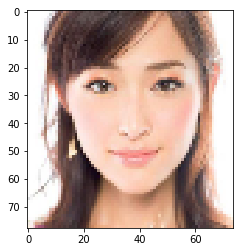

In [6]:
img_source = cv2.cvtColor(cv2.imread('./ignore/face.JPG'), cv2.COLOR_BGR2RGB).astype(np.uint8)
img_source = cv2.resize(img_source, (0,0), fx=0.25, fy=0.25)
plt.imshow(img_source)
plt.show()

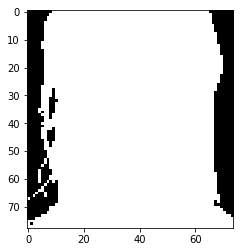

In [7]:
ans = auto_mask(img_source)
plt.imshow(ans)
plt.show()